In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [2]:
# data directory
data_dir = 'cell_images/'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'test/'
train_path = data_dir+'train/'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(test_path+'/parasitized')[0] # example image

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [7]:
para_cell = test_path+'/parasitized/'+os.listdir(test_path+'/parasitized')[0]

In [8]:
imread(para_cell).shape # image shape, it's a colored image with 3 channels

(136, 133, 3)

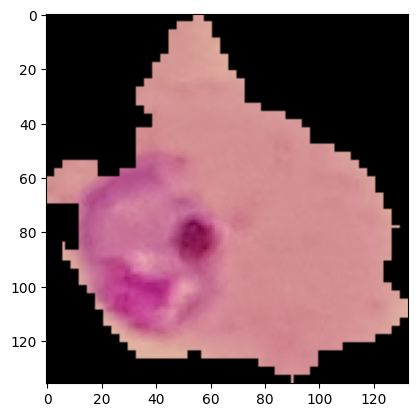

In [9]:
plt.imshow(imread(para_cell)) # show the image, the parasite is the purple thing inside the red blood cell

In [10]:
unifec_cell = test_path+'/uninfected/'+os.listdir(test_path+'/uninfected')[0]

In [11]:
unifec_cell = imread(unifec_cell)

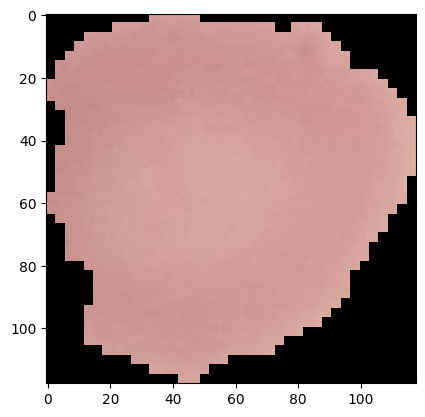

In [12]:
plt.imshow(unifec_cell) # show the image, this is an healthy cell

In [13]:
dim1 = [] 
dim2 = []

# check the dimensions of all images
for image_filename in os.listdir(test_path+'/uninfected'):
        
        img = imread(test_path+'/uninfected/'+image_filename) 
        d1,d2,colors = img.shape # get the dimensions
        dim1.append(d1) # append the dimensions
        dim2.append(d2) # append the dimensions
        

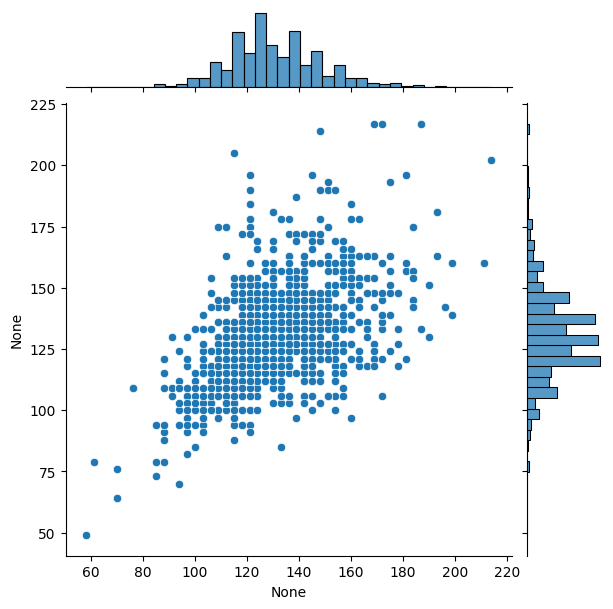

In [14]:
sns.jointplot(x=dim1,y=dim2) # the plot shows that the images have different dimensions

In [15]:
print(np.mean(dim1)) # average dimension 130
print(np.mean(dim2)) # average dimension 130
# we will resize the images to 130x130

130.92538461538462
130.75


In [16]:
image_shape = (130,130,3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

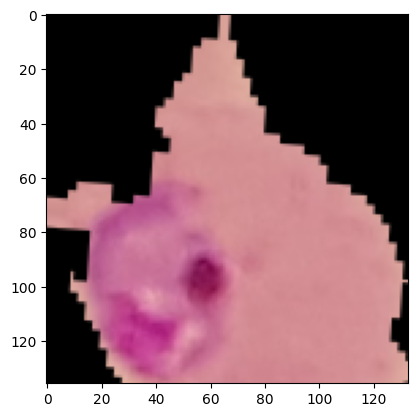

In [19]:
para_cell = imread(para_cell)
plt.imshow(image_gen.random_transform(para_cell)) # example of a transformed image

In [20]:
image_gen.flow_from_directory(train_path) # flow from directory
# 2 classes, parasitized and uninfected

Found 24958 images belonging to 2 classes.


In [21]:
image_gen.flow_from_directory(test_path) # flow from directory

Found 2600 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
batch_size = 16 # batch size, 16 images at a time

In [27]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [28]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [29]:
train_image_gen.class_indices # parasitized is 0, uninfected is 1

{'parasitized': 0, 'uninfected': 1}

In [30]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 536s 342ms/step - accuracy: 0.5830 - loss: 0.6629 - val_accuracy: 0.8658 - val_loss: 0.3767
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.9093 - loss: 0.2819 - val_accuracy: 0.9419 - val_loss: 0.1898
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.9392 - loss: 0.1988 - val_accuracy: 0.9458 - val_loss: 0.1789
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.9474 - loss: 0.1689 - val_accuracy: 0.9442 - val_loss: 0.1754
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.9482 - loss: 0.1617 - val_accuracy: 0.9458 - val_loss: 0.1735
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.9460 - loss: 0.1720 - val_accuracy: 0.9496 - val_loss: 0.1542
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.9504 - loss: 0.1585 - val_accuracy: 0.9450 - val_loss: 0.1650
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy:

In [31]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Axes: >

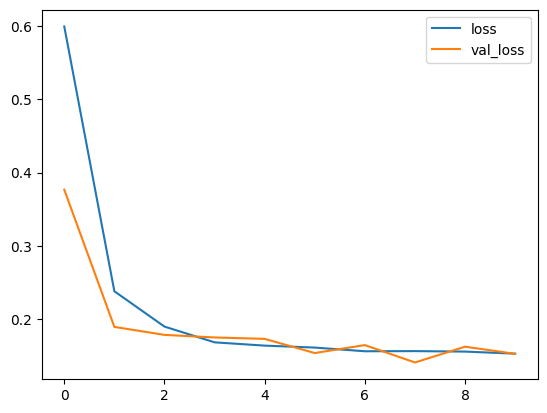

In [32]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [33]:
model.evaluate(test_image_gen) # 95% accuracy

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9438 - loss: 0.1629


[0.1616305410861969, 0.947692334651947]

In [34]:
pred = model.predict(test_image_gen) # predictions
predictions = pred > 0.5 # if the prediction is greater than 0.5, it's uninfected, otherwise it's parasitized
print(predictions)

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(test_image_gen.classes, predictions)) # very good results

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [37]:
from tensorflow.keras.preprocessing import image

In [38]:
para_cell_path = test_path+'/parasitized/'+os.listdir(test_path+'/parasitized')[0]
my_image = image.load_img(para_cell_path, target_size=image_shape) # load the image

In [39]:
my_image_array = image.img_to_array(my_image) # convert the image to an array

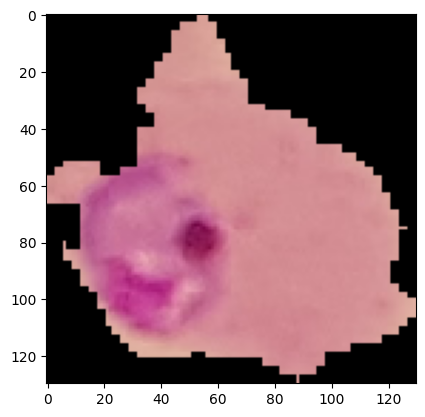

In [40]:
plt.imshow(my_image) # show the image

In [41]:
model.predict(my_image_array.reshape(1,130,130,3)) # predict the image, it's parasitized

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


array([[0.]], dtype=float32)

In [42]:
train_image_gen.class_indices # parasitized is 0, uninfected is 1

{'parasitized': 0, 'uninfected': 1}